In [1]:
from extract import SocialETL, construct_query_for_twarc, extract_tags, SocialDB, UserETL
import hashtags as h
import hashtags_readcsv as r_csv
import pandas as pd
import numpy as np
import json
import statistics
import networkx as nx
from numpy import nan

# 1) Download DF

In [2]:
#modifiche: cambiare data e togliere lang eng
m = SocialETL(query="(#strangerthings4 OR #onepiece OR #covid OR #pridemonth OR #grammys OR #justiceforjohnnydepp OR #putin OR #russia OR #ukraine OR #war)", pages=10, recent=False) #strangerthings4 

Output()

## creazione df_base

In [3]:
user_id=m.df['author_id'] 
set_user=set(user_id)
#un utente può aver fatto più di un tweet, in questo modo andiamo a vedere i suoi ultimi tweet solo una volta.
print(len(set_user))

837


In [4]:
hashtag_for_user={}
tweet_for_user={}
retweet_for_user={}
conversation_for_user={}
verified_for_user={}
location_for_user={}

for e in set_user:                                                             #1 pages=20 tweet   
    u=UserETL(e,pages=2)                                                       #aggiungere più pagine (1pag=20)
    #preprocessing hashtag
    u.df=u.df.dropna(subset=['entities.hashtags'])                             #drop nan values on column hashtags
    u.df.reset_index()
    u.df['entities.hashtags']=u.df['entities.hashtags'].apply(eval)            #convert into dict
    u.df["entities.hashtags"] = u.df["entities.hashtags"].map(h.extract_tags)  #extract tags
    hashtag_for_user[e]=u.df["entities.hashtags"].tolist()                     #convert pandas series into a list
    #preprocessing other attributes
    u.df=u.df.dropna(subset=['retweeted_user_id'])
    retweet_for_user[e]=u.df['retweeted_user_id'].tolist()
    conversation_for_user[e]=u.df['conversation_id'].tolist()
    tweet_for_user[e]=u.df['id'].tolist() 
    location_for_user[e]=u.df['author.location'].tolist()
    verified_for_user[e]=u.df['author.verified']

Output()

C:\Users\david\AppData\Local\Temp\ipykernel_5596\3906981418.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u.df['entities.hashtags']=u.df['entities.hashtags'].apply(eval)            #convert into dict
C:\Users\david\AppData\Local\Temp\ipykernel_5596\3906981418.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u.df["entities.hashtags"] = u.df["entities.hashtags"].map(h.extract_tags)  #extract tags


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

caught 503 from Twitter API, sleeping 1


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [5]:
user_id=[]
tweet_id=[]
hashtag=[]
retweet=[]
location=[]
verified=[]
conversation=[]
for u,h in hashtag_for_user.items():
    user_id.append(u)
    hashtag.append(h)
for u,t in tweet_for_user.items():
    tweet_id.append(t)
for u,r in retweet_for_user.items():
    retweet.append(r)
for u,l in location_for_user.items():
    nest_loc=[]
    for loc in l:
        if str(loc)!='nan':
            nest_loc.append(loc)
        else:
            nest_loc.append('no_loc')
    location.append(nest_loc)
    
for u,v in verified_for_user.items():
    verified.append(v)
for u,c in conversation_for_user.items():
    conversation.append(c)

In [6]:
#create a pandas dataframe
df_nodes=pd.DataFrame({"user_id":user_id,
                       'tweet_id':tweet_id,
                      'retweet_id': retweet,
                       'conversation_id':conversation,
                      "hashtag":hashtag,
                     'location':location,
                     'verified':verified})

In [7]:
df_nodes.set_index('user_id',inplace=True)

In [8]:
df_nodes['hashtag']=df_nodes['hashtag'].map(str).apply(eval)
df_nodes['tweet_id']=df_nodes['tweet_id'].map(str).apply(eval)
df_nodes['conversation_id']=df_nodes['conversation_id'].map(str).apply(eval)
df_nodes['retweet_id']=df_nodes['retweet_id'].map(str).apply(eval)
df_nodes['location']=df_nodes['location'].map(str).apply(eval)
df_nodes['verified']=df_nodes['verified'].map(str).apply(eval)

SyntaxError: invalid syntax (<string>, line 1)

## preprocessing 

In [9]:
#convert nested lists on set
def to_sets(nested_lists): 
    outer_list = set()
    for el in nested_lists: 
        if type(el) == list: 
            outer_list.update(el) 
        else: 
            outer_list.add(el)
    return outer_list

In [10]:
df_nodes['hashtag']=df_nodes['hashtag'].map(to_sets)
df_nodes['tweet_id']=df_nodes['tweet_id'].map(to_sets)
df_nodes['conversation_id']=df_nodes['conversation_id'].map(to_sets)
df_nodes['retweet_id']=df_nodes['retweet_id'].map(to_sets)
df_nodes['verified']=df_nodes['verified'].map(to_sets)
df_nodes['location']=df_nodes['location'].map(to_sets)

In [11]:
df_nodes.head(3)

,tweet_id,retweet_id,conversation_id,hashtag,location,verified
user_id,,,,,,
1728223231,"{1559280455228211200, 1559280294179573761}","{1157249837206843392, 22364234}","{1559280455228211200, 1559280294179573761}","{putin, russland, zaporizhzhianpp, nuclearsecu...","{Richmond, London}",{False}
1325943891456110592,"{1559280455228211200, 1559280294179573761}","{1157249837206843392, 22364234}","{1559280455228211200, 1559280294179573761}","{democracy, putin, russland, war, zaporizhzhia...","{Richmond, London}",{False}
132936078,"{1558673064895754243, 1559083445636063234, 155...","{95207674, 3184439965, 1157249837206843392, 11...","{1558673064895754243, 1559083445636063234, 155...","{, onepiece, nuclearsecurity, interview, elezi...","{暴風雨のサニー号みかん畑とサイタマ宅座布団で反転術式, Richmond, London}",{False}


In [12]:
df_nodes.shape

(837, 6)

In [13]:
#df_nodes.to_csv('df_nodes')

# 2) Categorizzazione utenti

In [14]:
with open('hashtags_300.json', 'r') as f:
    my_dict = json.load(f)

In [15]:
proukr=set()
prorus=set()
pax=set()
for k,v in my_dict.items():
    for e in v:
        if k=='proukr':
            proukr.update(e)
        elif k=='pax':
            pax.update(e)
        elif k=='prorus':
            prorus.update(e)

In [16]:
cat=set.union(proukr,prorus,pax)
count1=0
count4=0
index1=[]
index4=[]

for i, row in enumerate(df_nodes['hashtag']): 
    if row.intersection(cat)==set():#no intersezione   
        #print(row.intersectionn(cat))
        #print("l'utente {}  appartiene alla 4 categoria".format(row.intersection(cat)))
        #print("4 categoria", row)
        count4 += 1
        index4.append(df_nodes.index[i])
        
    else: #c'è intersezione: uno della 3 categorie
        #print("non è la 4 categoria perchè contiene",row.intersection(cat))
       # if row.intersection(proukr)!=set(): #c'è intersez con proukr
            count1 += 1
            index1.append(i) #aggiungo alle rige da tgliere
            print("l'utente {} non  appartiene alla 4 categoria perchè usa {}".format(df_nodes.index[i],row.intersection(cat)))

l'utente 1728223231 non  appartiene alla 4 categoria perchè usa {'putin', 'russiainvadedukraine', 'russland', 'russiaisaterroriststate'}
l'utente 1325943891456110592 non  appartiene alla 4 categoria perchè usa {'democracy', 'putin', 'war', 'usa', 'russiainvadedukraine', 'italy', 'news', 'russland', 'russiaisaterroriststate'}
l'utente 132936078 non  appartiene alla 4 categoria perchè usa {'democracy', 'putin', 'war', 'usa', 'russiainvadedukraine', 'italy', 'news', 'russland', 'russiaisaterroriststate'}
l'utente 571263138 non  appartiene alla 4 categoria perchè usa {'democracy', 'putin', 'war', 'usa', 'russiainvadedukraine', 'italy', 'news', 'russland', 'russiaisaterroriststate'}
l'utente 999116830974337024 non  appartiene alla 4 categoria perchè usa {'democracy', 'putin', 'war', 'usa', 'russiainvadedukraine', 'italy', 'news', 'russland', 'russiaisaterroriststate'}
l'utente 1438639224127901698 non  appartiene alla 4 categoria perchè usa {'democracy', 'putin', 'war', 'uk', 'usa', 'ukraine

l'utente 1161008395689889802 non  appartiene alla 4 categoria perchè usa {'quotes', 'macron', 'donbass', 'ukraine', 'children', 'covid19', 'zelensky', 'infosec', 'scholz', 'slavaukraini', 'cyber', 'sakpol', 'schroeder', 'azovstaldefenders', 'btc', 'ukrainewar', 'cybersecurity', 'eu', 'mariupol', 'turpo', 'salvini', 'gas', 'covid_19', 'russia', 'russiainvadedukraine', 'bucha', 'russland', 'helsinki', 'ukrainian', 'krieg', 'africa', 'elezioni2022', 'war', 'nfts', 'dkpol', 'fellas', 'fdp', 'misstrauensvotum', 'breakingnews', 'biden', 'news', 'spd', 'russiaisaterroriststate', 'russian', 'eth', 'putin', 'democracy', 'armukrainenow', 'uk', 'usa', 'standwithukraine', 'nato', 'rusia', 'donetsk', 'inspiration', 'nordstream1', 'wearenafo', 'italy', 'merkel', 'freeazovstaldefenders', 'covidisnotover'}
l'utente 1002353456865251329 non  appartiene alla 4 categoria perchè usa {'quotes', 'macron', 'donbass', 'ukraine', 'children', 'covid19', 'zelensky', 'infosec', 'scholz', 'slavaukraini', 'cyber', '

l'utente 1156663520680992768 non  appartiene alla 4 categoria perchè usa {'ukraine', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'mariupol', 'kyiv', 'ukrainewillwin', 'lukashenko', 'fdp', 'misstrauensvotum', 'russian', 'eth', 'usa', 'standwithukraine', 'nordstream1', 'melitopol', 'wearenafo', 'covidisnotover', 'cyber', 'ukrainewar', 'btc', 'cybersecurity', 'eu', 'turpo', 'russiaukrainewar', 'russiainvadedukraine', 'ukraineunderattack', 'bucha', 'helsinki', 'krieg', 'war', 'nfts', 'breakingnews', 'news', 'russianaggression', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'belarus', 'quotes', 'donbass', 'children', 'slavaukraini', 'nuclear', 'kharkiv', 'salvini', 'habeck', 'gas', 'covid_19', 'zaporizhzhia', 'ukrainerussianwar', 'armukrainenow', 'nato', 'breaking', 'inspiration', 'italy', 'merkel', 'schroeder', 'macron', 'covid19', 'infosec', 'azovstaldefenders', 'moscow', 'russia', 'stoprussianaggression', 'russland', 'deutschland', 'ukrainian', 'africa', 'elezioni2022', '

l'utente 888854474651029505 non  appartiene alla 4 categoria perchè usa {'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'boots', 'mariupol', 'peaceinukraine', 'kyiv', 'blackandwhite', 'ukrainewillwin', 'lukashenko', 'fdp', 'misstrauensvotum', 'russian', 'eth', 'usa', 'standwithukraine', 'nordstream1', 'melitopol', 'wearenafo', 'uaarmy', 'covidisnotover', 'nazirussia', 'cyber', 'ukrainewar', 'btc', 'cybersecurity', 'eu', 'russiaisaterrorisstate', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukraineunderattack', 'bucha', 'helsinki', 'krieg', 'war', 'nfts', 'nikopol', 'breakingnews', 'news', 'russianaggression', 'protest', 'ucraine', 'latvia', 'drawing', 'zelenskyy', 'freeazovstaldefenders', 'belarus', 'quotes', 'donbass', 'children', 'slavaukraini', 'nuclear', 'kharkiv', 'ue', 'mykolayiv', 'salvini', 'habeck', 'gas', 'covid_19', 'olenivka', 'russianwarcrimes', 'zaporizhzhia', 'hope', 'ukrainerussianwar', 'armukrainenow', 'landscape'

l'utente 1440841994251636736 non  appartiene alla 4 categoria perchè usa {'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'mariupol', 'peaceinukraine', 'kyiv', 'blackandwhite', 'ukrainewillwin', 'lukashenko', 'wagner', 'fdp', 'misstrauensvotum', 'russian', 'eth', 'grunen', 'usa', 'standwithukraine', 'nordstream1', 'melitopol', 'wearenafo', 'uaarmy', 'covidisnotover', 'nazirussia', 'cyber', 'ukrainewar', 'btc', 'cybersecurity', 'eu', 'russiaisaterrorisstate', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukraineunderattack', 'bucha', 'helsinki', 'krieg', 'war', 'nfts', 'nikopol', 'breakingnews', 'news', 'russianaggression', 'protest', 'ucraine', 'latvia', 'drawing', 'zelenskyy', 'freeazovstaldefenders', 'belarus', 'quotes', 'donbass', 'children', 'slavaukraini', 'nuclear', 'kharkiv', 'ue', 'mykolayiv', 'salvini', 'habeck', 'gas', 'covid_19', 'olenivka', 'naturephotography', 'russianwarcrimes', 'zaporizhzhia', 'ho

l'utente 1018551711428894721 non  appartiene alla 4 categoria perchè usa {'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'kherson', 'mariupol', 'peaceinukraine', 'kyiv', 'blackandwhite', 'ukrainewillwin', 'lukashenko', 'wagner', 'fdp', 'misstrauensvotum', 'russian', 'eth', 'grunen', 'usa', 'standwithukraine', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'uaarmy', 'covidisnotover', 'nazirussia', 'cyber', 'ukrainewar', 'btc', 'cybersecurity', 'eu', 'russiaisaterrorisstate', 'fckptn', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukraineunderattack', 'bucha', 'helsinki', 'krieg', 'war', 'nfts', 'nikopol', 'breakingnews', 'news', 'russianaggression', 'protest', 'ucraine', 'latvia', 'drawing', 'zelenskyy', 'freeazovstaldefenders', 'belarus', 'quotes', 'donbass', 'children', 'slavaukraini', 'nuclear', 'kharkiv', 'ue', 'mykolayiv', 'salvini', 'habeck', 'russen', 'gas', 'covid_19', 'olenivka', 'naturephotography

l'utente 435790207 non  appartiene alla 4 categoria perchè usa {'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'kherson', 'mariupol', 'peaceinukraine', 'kyiv', 'poutine', 'blackandwhite', 'ukrainewillwin', 'lukashenko', 'wagner', 'fdp', 'misstrauensvotum', 'russian', 'eth', 'grunen', 'america', 'usa', 'standwithukraine', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'uaarmy', 'covidisnotover', 'nazirussia', 'cyber', 'ukrainewar', 'btc', 'cybersecurity', 'eu', 'russiaisaterrorisstate', 'fckptn', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukraineunderattack', 'bucha', 'helsinki', 'krieg', 'war', 'nfts', 'nikopol', 'breakingnews', 'news', 'russianaggression', 'protest', 'ucraine', 'latvia', 'drawing', 'zelenskyy', 'freeazovstaldefenders', 'belarus', 'quotes', 'donbass', 'children', 'slavaukraini', 'nuclear', 'kharkiv', 'ue', 'mykolayiv', 'salvini', 'habeck', 'russen', 'gas', 'covid_19', 'olenivka', 'natur

l'utente 1465306831845273600 non  appartiene alla 4 categoria perchè usa {'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'kherson', 'mariupol', 'peaceinukraine', 'kyiv', 'poutine', 'blackandwhite', 'ukrainewillwin', 'lukashenko', 'wagner', 'fdp', 'misstrauensvotum', 'russian', 'eth', 'grunen', 'america', 'usa', 'standwithukraine', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'uaarmy', 'covidisnotover', 'nazirussia', 'cyber', 'ukrainewar', 'btc', 'cybersecurity', 'eu', 'russiaisaterrorisstate', 'fckptn', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukraineunderattack', 'bucha', 'helsinki', 'krieg', 'war', 'nfts', 'nikopol', 'breakingnews', 'berlin', 'news', 'russianaggression', 'protest', 'ucraine', 'latvia', 'drawing', 'zelenskyy', 'freeazovstaldefenders', 'belarus', 'quotes', 'donbass', 'children', 'slavaukraini', 'nuclear', 'kharkiv', 'ue', 'mykolayiv', 'salvini', 'habeck', 'russen', 'gas', 'covid_19'

l'utente 60827427 non  appartiene alla 4 categoria perchè usa {'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'kherson', 'mariupol', 'peaceinukraine', 'kyiv', 'poutine', 'blackandwhite', 'ukrainewillwin', 'sanktionen', 'lukashenko', 'wagner', 'nazis', 'russiancolonialism', 'fdp', 'misstrauensvotum', 'russian', 'eth', 'grunen', 'america', 'usa', 'standwithukraine', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'wagenknecht', 'uaarmy', 'covidisnotover', 'nazirussia', 'cyber', 'ukrainewar', 'btc', 'cybersecurity', 'eu', 'russiaisaterrorisstate', 'fckptn', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukraineunderattack', 'bucha', 'helsinki', 'krieg', 'war', 'nfts', 'nikopol', 'breakingnews', 'berlin', 'news', 'russianaggression', 'protest', 'ucraine', 'latvia', 'drawing', 'zelenskyy', 'freeazovstaldefenders', 'belarus', 'quotes', 'donbass', 'children', 'slavaukraini', 'nuclear', 'kharkiv', 'ue', 'mykolayiv',

l'utente 456595925 non  appartiene alla 4 categoria perchè usa {'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'kherson', 'mariupol', 'peaceinukraine', 'kyiv', 'poutine', 'blackandwhite', 'ukrainewillwin', 'sanktionen', 'lukashenko', 'wagner', 'nazis', 'russiancolonialism', 'fdp', 'live', 'misstrauensvotum', 'russian', 'eth', 'grunen', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'wagenknecht', 'uaarmy', 'covidisnotover', 'nazirussia', 'cyber', 'ukrainewar', 'btc', 'cybersecurity', 'eu', 'russiaisaterrorisstate', 'fckptn', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukraineunderattack', 'bucha', 'helsinki', 'krieg', 'war', 'nfts', 'nikopol', 'breakingnews', 'berlin', 'news', 'russianaggression', 'protest', 'ucraine', 'latvia', 'drawing', 'zelenskyy', 'freeazovstaldefenders', 'belarus', 'fella', 'quotes', 'donbass', 'children', 'slavaukraini', 'nuclear', 

l'utente 243298513 non  appartiene alla 4 categoria perchè usa {'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'kherson', 'mariupol', 'peaceinukraine', 'kyiv', 'poutine', 'blackandwhite', 'foxnews', 'ukrainewillwin', 'sanktionen', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'russiancolonialism', 'fdp', 'live', 'misstrauensvotum', 'russian', 'eth', 'grunen', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'wagenknecht', 'uaarmy', 'covidisnotover', 'nazirussia', 'cyber', 'ukrainewar', 'btc', 'cybersecurity', 'eu', 'russiaisaterrorisstate', 'fckptn', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukraineunderattack', 'bucha', 'helsinki', 'krieg', 'war', 'nfts', 'nikopol', 'breakingnews', 'berlin', 'news', 'russianaggression', 'protest', 'ucraine', 'latvia', 'drawing', 'zelenskyy', 'freeazovstaldefenders', 'belarus', 'fella', 'quotes', 'donbass', 'children

l'utente 1486383797822238724 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'kherson', 'dnipro', 'mariupol', 'peaceinukraine', 'kyiv', 'poutine', 'blackandwhite', 'foxnews', 'ukrainewillwin', 'sanktionen', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'crimea', 'russiancolonialism', 'fdp', 'live', 'misstrauensvotum', 'russian', 'eth', 'grunen', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'wagenknecht', 'uaarmy', 'covidisnotover', 'nazirussia', 'cyber', 'ukrainewar', 'btc', 'cybersecurity', 'eu', 'russiaisaterrorisstate', 'fckptn', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukraineunderattack', 'bucha', 'stoprussia', 'helsinki', 'krieg', 'war', 'nfts', 'nikopol', 'himars', 'united24', 'luhansk', 'breakingnews', 'berlin', 'news', 'russianaggression', 'protest', 'ucraine', 'latvia', 'drawi

l'utente 2538270204 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'kherson', 'dnipro', 'mariupol', 'peaceinukraine', 'kyiv', 'poutine', 'blackandwhite', 'foxnews', 'ukrainewillwin', 'sanktionen', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'crimea', 'russiancolonialism', 'fdp', 'live', 'misstrauensvotum', 'russian', 'eth', 'grunen', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'wagenknecht', 'uaarmy', 'covidisnotover', 'nazirussia', 'cyber', 'ukrainewar', 'btc', 'cybersecurity', 'eu', 'russiaisaterrorisstate', 'fckptn', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukraineunderattack', 'bucha', 'stoprussia', 'helsinki', 'krieg', 'war', 'nfts', 'nikopol', 'himars', 'united24', 'luhansk', 'breakingnews', 'berlin', 'news', 'russianaggression', 'protest', 'ucraine', 'latvia', 'drawing', 'zel

l'utente 2463157754 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'kherson', 'dnipro', 'mariupol', 'peaceinukraine', 'kyiv', 'poutine', 'blackandwhite', 'foxnews', 'ukrainewillwin', 'sanktionen', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'crimea', 'russiancolonialism', 'fdp', 'live', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'wagenknecht', 'uaarmy', 'covidisnotover', 'nazirussia', 'cyber', 'ukrainewar', 'btc', 'cybersecurity', 'eu', 'russiaisaterrorisstate', 'fckptn', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukraineunderattack', 'bucha', 'stoprussia', 'helsinki', 'krieg', 'war', 'nfts', 'nikopol', 'himars', 'united24', 'luhansk', 'breakingnews', 'berlin', 'news', 'kremlin', 'russianaggression', 'lviv', 'protest', 'ucrain

l'utente 1469878859159977985 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'kherson', 'dnipro', 'mariupol', 'peaceinukraine', 'kyiv', 'poutine', 'blackandwhite', 'foxnews', 'ukrainewillwin', 'sanktionen', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'crimea', 'russiancolonialism', 'fdp', 'live', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'wagenknecht', 'uaarmy', 'saveukraine', 'covidisnotover', 'nazirussia', 'cyber', 'ukrainewar', 'btc', 'cybersecurity', 'eu', 'russiaisaterrorisstate', 'fckptn', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukraineunderattack', 'bucha', 'stoprussia', 'helsinki', 'krieg', 'war', 'nfts', 'nikopol', 'himars', 'united24', 'luhansk', 'breakingnews', 'berlin', 'news', 'kremlin', 'russianaggression', 'l

l'utente 1549480181076721665 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'kherson', 'dnipro', 'mariupol', 'peaceinukraine', 'kyiv', 'poutine', 'blackandwhite', 'foxnews', 'ukrainewillwin', 'sanktionen', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'crimea', 'russiancolonialism', 'fdp', 'live', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'wagenknecht', 'uaarmy', 'saveukraine', 'covidisnotover', 'nazirussia', 'cyber', 'ukrainewar', 'btc', 'cybersecurity', 'eu', 'russiaisaterrorisstate', 'fckptn', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukraineunderattack', 'bucha', 'stoprussia', 'helsinki', 'krieg', 'war', 'nfts', 'nikopol', 'himars', 'united24', 'luhansk', 'breakingnews', 'berlin', 'news', 'kremlin', 'russianaggr

l'utente 1343144986511101954 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'kherson', 'dnipro', 'mariupol', 'peaceinukraine', 'kyiv', 'poutine', 'blackandwhite', 'foxnews', 'ukrainewillwin', 'sanktionen', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'crimea', 'russiancolonialism', 'fdp', 'live', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'wagenknecht', 'uaarmy', 'saveukraine', 'covidisnotover', 'nazirussia', 'cyber', 'ukrainewar', 'btc', 'cybersecurity', 'eu', 'russiaisaterrorisstate', 'fckptn', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukraineunderattack', 'bucha', 'stoprussia', 'helsinki', 'krieg', 'war', 'nfts', 'nikopol', 'himars', 'united24', 'luhansk', 'breakingnews', 'berlin', 'ne

l'utente 2903830469 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'kherson', 'dnipro', 'mariupol', 'peaceinukraine', 'kyiv', 'poutine', 'blackandwhite', 'foxnews', 'ukrainewillwin', 'sanktionen', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'crimea', 'russiancolonialism', 'fdp', 'live', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'wagenknecht', 'uaarmy', 'saveukraine', 'covidisnotover', 'nazirussia', 'cyber', 'ukrainewar', 'btc', 'cybersecurity', 'eu', 'russiaisaterrorisstate', 'fckptn', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukraineunderattack', 'bucha', 'stoprussia', 'helsinki', 'krieg', 'war', 'nfts', 'nikopol', 'himars', 'united24', 'luhansk', 'breakingnews', 'berlin', 'news', 'kre

l'utente 851094972048621569 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'kherson', 'dnipro', 'mariupol', 'peaceinukraine', 'kyiv', 'poutine', 'blackandwhite', 'foxnews', 'ukrainewillwin', 'sanktionen', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'russiancolonialism', 'fdp', 'live', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'wagenknecht', 'uaarmy', 'saveukraine', 'covidisnotover', 'nazirussia', 'cyber', 'ukrainewar', 'btc', 'cybersecurity', 'eu', 'russiaisaterrorisstate', 'fckptn', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukraineunderattack', 'bucha', 'stoprussia', 'helsinki', 'krieg', 'war', 'nfts', 'nikopol', 'himars', 'united24', 'luhansk', 'breakingnews', 'ber

l'utente 720809947 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'kherson', 'dnipro', 'mariupol', 'peaceinukraine', 'kyiv', 'poutine', 'blackandwhite', 'foxnews', 'ukrainewillwin', 'sanktionen', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'russiancolonialism', 'fdp', 'live', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'wagenknecht', 'uaarmy', 'saveukraine', 'covidisnotover', 'nazirussia', 'cyber', 'ukrainewar', 'btc', 'cybersecurity', 'eu', 'russiaisaterrorisstate', 'fckptn', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukraineunderattack', 'bucha', 'stoprussia', 'helsinki', 'krieg', 'twitter', 'war', 'nfts', 'nikopol', 'himars', 'united24', '

l'utente 1120087764324712448 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'kherson', 'dnipro', 'mariupol', 'poutine', 'peaceinukraine', 'kyiv', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'russiancolonialism', 'fdp', 'live', 'misstrauensvotum', 'energy', 'eth', 'grunen', 'russian', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'frexit', 'un', 'nazirussia', 'cyber', 'btc', 'ukrainewar', 'cybersecurity', 'eu', 'fckptn', 'russiaisaterrorisstate', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukraineunderattack', 'stoprussia', 'bucha', 'helsinki', 'krieg', 'twitter', 'war', 'nfts', 'nikopol

l'utente 838321345570156545 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'kherson', 'dnipro', 'mariupol', 'poutine', 'peaceinukraine', 'kyiv', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'russiancolonialism', 'fdp', 'live', 'misstrauensvotum', 'energy', 'eth', 'grunen', 'russian', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'frexit', 'un', 'nazirussia', 'cyber', 'btc', 'ukrainewar', 'cybersecurity', 'eu', 'fckptn', 'russiaisaterrorisstate', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukraineunderattack', 'stoprussia', 'bucha', 'helsinki', 'krieg', 'twitter', 'war', 'nfts', 'nikopol'

l'utente 1549141288557101056 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'kherson', 'dnipro', 'mariupol', 'poutine', 'peaceinukraine', 'kyiv', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'russiancolonialism', 'fdp', 'live', 'misstrauensvotum', 'energy', 'eth', 'grunen', 'russian', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'frexit', 'un', 'nazirussia', 'cyber', 'btc', 'ukrainewar', 'cybersecurity', 'eu', 'fckptn', 'russiaisaterrorisstate', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukraineunderattack', 'stoprussia', 'bucha', 'helsinki', 'krieg', 'twitter', 'war', 'nfts', 'nikopol

l'utente 1477592383227404289 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'kherson', 'dnipro', 'mariupol', 'poutine', 'peaceinukraine', 'kyiv', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'russiancolonialism', 'fdp', 'live', 'misstrauensvotum', 'energy', 'eth', 'grunen', 'russian', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'frexit', 'un', 'nazirussia', 'cyber', 'btc', 'ukrainewar', 'cybersecurity', 'eu', 'fckptn', 'russiaisaterrorisstate', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukraineunderattack', 'stoprussia', 'bucha', 'helsinki', 'krieg', 'twitter', 'war', 'nfts', 'nikopol

l'utente 1095430460635840513 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'kherson', 'dnipro', 'mariupol', 'poutine', 'peaceinukraine', 'kyiv', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'russiancolonialism', 'fdp', 'live', 'misstrauensvotum', 'energy', 'eth', 'grunen', 'russian', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'frexit', 'un', 'nazirussia', 'cyber', 'btc', 'ukrainewar', 'cybersecurity', 'eu', 'fckptn', 'russiaisaterrorisstate', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukraineunderattack', 'stoprussia', 'bucha', 'helsinki', 'krieg', 'twitter', 'war', 'nfts', 'nikopol

l'utente 1518255018708713477 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'kherson', 'dnipro', 'mariupol', 'poutine', 'peaceinukraine', 'kyiv', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'russiancolonialism', 'fdp', 'live', 'misstrauensvotum', 'energy', 'eth', 'grunen', 'russian', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'frexit', 'un', 'nazirussia', 'cyber', 'btc', 'ukrainewar', 'cybersecurity', 'eu', 'fckptn', 'russiaisaterrorisstate', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukraineunderattack', 'stoprussia', 'bucha', 'helsinki', 'krieg', 'twitter', 'war', 'nfts', 'nikopol

l'utente 521620495 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'kherson', 'dnipro', 'mariupol', 'poutine', 'peaceinukraine', 'kyiv', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'russiancolonialism', 'fdp', 'live', 'misstrauensvotum', 'energy', 'eth', 'grunen', 'russian', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'frexit', 'un', 'nazirussia', 'cyber', 'btc', 'ukrainewar', 'cybersecurity', 'eu', 'fckptn', 'russiaisaterrorisstate', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukraineunderattack', 'stoprussia', 'bucha', 'helsinki', 'krieg', 'twitter', 'war', 'nfts', 'nikopol', 'himars

l'utente 1104658675115806721 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'kherson', 'dnipro', 'mariupol', 'poutine', 'peaceinukraine', 'kyiv', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'russiancolonialism', 'fdp', 'live', 'misstrauensvotum', 'energy', 'eth', 'grunen', 'russian', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'frexit', 'un', 'nazirussia', 'cyber', 'btc', 'ukrainewar', 'cybersecurity', 'eu', 'fckptn', 'russiaisaterrorisstate', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukraineunderattack', 'stoprussia', 'bucha', 'helsinki', 'krieg', 'twitter', 'war', 'nfts', 'nikopol

l'utente 1318654500488577024 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'kherson', 'dnipro', 'mariupol', 'poutine', 'peaceinukraine', 'kyiv', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'russiancolonialism', 'fdp', 'live', 'misstrauensvotum', 'energy', 'eth', 'grunen', 'russian', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'frexit', 'un', 'nazirussia', 'cyber', 'btc', 'ukrainewar', 'cybersecurity', 'eu', 'fckptn', 'russiaisaterrorisstate', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukraineunderattack', 'stoprussia', 'bucha', 'helsinki', 'krieg', 'twitter', 'war', 'nfts', 'nikopol

l'utente 938433275332386816 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'kherson', 'dnipro', 'mariupol', 'poutine', 'peaceinukraine', 'kyiv', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'russiancolonialism', 'fdp', 'ai', 'live', 'misstrauensvotum', 'energy', 'eth', 'grunen', 'russian', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'frexit', 'un', 'drones', 'nazirussia', 'cyber', 'btc', 'ukrainewar', 'cybersecurity', 'eu', 'fckptn', 'russiaisaterrorisstate', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukraineunderattack', 'stoprussia', 'bucha', 'helsinki', 'krieg', 'twitter', 'war', '

l'utente 4727502656 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'kherson', 'dnipro', 'mariupol', 'poutine', 'peaceinukraine', 'kyiv', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'russiancolonialism', 'fdp', 'ai', 'live', 'misstrauensvotum', 'energy', 'eth', 'grunen', 'russian', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'frexit', 'un', 'drones', 'nazirussia', 'cyber', 'btc', 'ukrainewar', 'cybersecurity', 'eu', 'fckptn', 'russiaisaterrorisstate', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukraineunderattack', 'stoprussia', 'bucha', 'helsinki', 'krieg', 'twitter', 'war', 'nfts', '

l'utente 550020605 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'kherson', 'dnipro', 'mariupol', 'poutine', 'peaceinukraine', 'kyiv', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'vinnytsia', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'russiancolonialism', 'fdp', 'ai', 'live', 'misstrauensvotum', 'energy', 'eth', 'grunen', 'russian', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'frexit', 'un', 'drones', 'nazirussia', 'cyber', 'btc', 'ukrainewar', 'cybersecurity', 'eu', 'fckptn', 'russiaisaterrorisstate', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukraineunderattack', 'stoprussia', 'bucha', 'helsinki', 'krieg', 'twitter', 'war

l'utente 4193308653 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'vinnytsia', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'un', 'drones', 'nazirussia', 'cyber', 'btc', 'ukrainewar', 'cybersecurity', 'denazifyukraine', 'eu', 'russiaisaterrorisstate', 'fckptn', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukraineunderattack', '

l'utente 1079890821913165824 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'vinnytsia', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'un', 'drones', 'nazirussia', 'cyber', 'btc', 'ukrainewar', 'cybersecurity', 'denazifyukraine', 'eu', 'russiaisaterrorisstate', 'fckptn', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukraineundera

l'utente 1532454386655543316 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'vinnytsia', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'un', 'drones', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'denazifyukraine', 'eu', 'russiaisaterrorisstate', 'fckptn', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine

l'utente 731777001153957888 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'vinnytsia', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'un', 'drones', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'denazifyukraine', 'eu', 'russiaisaterrorisstate', 'fckptn', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine'

l'utente 1203056752196874240 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'vinnytsia', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'un', 'drones', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'denazifyukraine', 'eu', 'russiaisaterrorisstate', 'fckptn', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine

l'utente 1191460282973007872 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'vinnytsia', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'un', 'drones', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'denazifyukraine', 'eu', 'russiaisaterrorisstate', 'fckptn', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine

l'utente 1638685543 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'vinnytsia', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'un', 'drones', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'denazifyukraine', 'eu', 'russiaisaterrorisstate', 'fckptn', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine', 'ukrai

l'utente 1420962115544752137 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'un', 'drones', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'denazifyukraine', 'eu', 'russiaisaterrorisstate', 'fckptn', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvade

l'utente 2898511003 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'un', 'drones', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'denazifyukraine', 'eu', 'russiaisaterrorisstate', 'fckptn', 'turpo', 'russiaukrainewar', 'chinataiwan', 'russiainvadedukraine'

l'utente 1487120263246397449 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'un', 'drones', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'denazifyukraine', 'eu', 'russiaisaterrorisstate', 'fckptn', 'turpo', 'russiaukrainewa

l'utente 1091480320975749121 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'denazifyukraine', 'eu', 'russiaisaterrorisstate', 'fckptn',

l'utente 1498806254357168132 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'denazifyukraine', 'eu', 'russiaisaterrorisstate', 'fckptn',

l'utente 1220004046888550403 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'denazifyukraine', 'eu', 'russiaisaterrorisstate', 'fckptn',

l'utente 847457526480109574 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'denazifyukraine', 'eu', 'russiaisaterrorisstate', 'fckptn', 

l'utente 1136498189362696192 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'denazifyukraine', 'eu', 'russiaisaterrorisstate', 'fckptn',

l'utente 268385416 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'denazifyukraine', 'eu', 'russiaisaterrorisstate', 'fckptn', 'turpo', 

l'utente 1120623170 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'denazifyukraine', 'eu', 'russiaisaterrorisstate', 'fckptn', 'turpo',

l'utente 1004584360085864450 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'onev1', 'denazifyukraine', 'eu', 'russiaisaterror

l'utente 1437134692730429444 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'rip', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'onev1', 'denazifyukraine', 'eu', 'russiais

l'utente 4907325358 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'rip', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'onev1', 'denazifyukraine', 'eu', 'russiaisaterroris

l'utente 1393920328485818369 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'rip', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'onev1', 'denazifyukraine', 'eu', 'russiais

l'utente 1552005651433398272 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'rip', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'chicago', 'onev1', 'denazifyukraine', 'eu'

l'utente 23450981 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'rip', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'chicago', 'onev1', 'denazifyukraine', 'eu', 'russiais

l'utente 2660180248 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'rip', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'chicago', 'onev1', 'denazifyukraine', 'eu', 'russia

l'utente 2783708876 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'rip', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'chicago', 'onev1', 'denazifyukraine', 'eu', 'russia

l'utente 3592578915 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'rip', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'chicago', 'onev1', 'denazifyukraine', 'eu', 'russia

l'utente 1334591707674005504 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'rip', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'chicago', 'onev1', 'denazifyukraine', 'eu'

l'utente 1495923975419052033 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'joebiden', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'rip', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'chicago', 'onev1', 'denazifyuk

l'utente 2758332206 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'joebiden', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'rip', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'chicago', 'onev1', 'denazifyukraine', '

l'utente 946463611324641280 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'joebiden', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'rip', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'chicago', 'onev1', 'denazifyukr

l'utente 747479034796343297 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'joebiden', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'rip', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'chicago', 'onev1', 'denazifyukr

l'utente 1454502163 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'joebiden', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'grano', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'rip', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'chicago', 'onev1', 'denazifyuk

l'utente 18141599 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'joebiden', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'grano', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'rip', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'chicago', 'onev1', 'denazifyukra

l'utente 99499275 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'joebiden', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'grano', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'rip', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'chicago', 'onev

l'utente 4646677163 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'joebiden', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'grano', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'rip', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'chicago', 'on

l'utente 1040789114663133184 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'joebiden', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'grano', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'rip', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'chic

l'utente 472404680 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'joebiden', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'grano', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'rip', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'chicago', 'one

l'utente 1423882116761219077 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'joebiden', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'grano', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'rip', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'chic

l'utente 342188187 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'joebiden', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'grano', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'rip', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'chicago', 'one

l'utente 440293204 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'joebiden', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'grano', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'wearenato', 'rip', 'nazirussia', 'cyber', 'lgbtq', 'btc', 'ukrainewar', 'cybersecurity', 'c

l'utente 1512153707231731714 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'australia', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'joebiden', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'grano', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'italia', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'grune', 'wearenato', 'rip', 'nazirussia', 'cyber', 'lgbtq'

l'utente 1415741085851160576 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'australia', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'joebiden', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'grano', 'nordstream1', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'italia', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'grune', 'wearenato', 'rip', 'nazirussia', 'cyber', 'lgbtq'

l'utente 1462839998701473793 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'australia', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'joebiden', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'grano', 'nordstream1', 'fyp', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'italia', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'grune', 'wearenato', 'rip', 'nazirussia', 'cyber', 

l'utente 701738700821159936 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'australia', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'joebiden', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'grano', 'nordstream1', 'fyp', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'italia', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'grune', 'wearenato', 'rip', 'nazirussia', 'cyber', '

l'utente 1962267314 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'friends', 'australia', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'joebiden', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'grano', 'nordstream1', 'fyp', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'italia', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'grune', 'wearenato', 'rip', 'nazirussia', 'cyber'

l'utente 1434582454434684940 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'friends', 'australia', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'joebiden', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'grano', 'nordstream1', 'fyp', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'italia', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'grune', 'wearenato', 'rip', 'nazirussia'

l'utente 1085703012352442369 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'friends', 'australia', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'joebiden', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'grano', 'nordstream1', 'fyp', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'italia', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'grune', 'wearenato', 'rip', 'nazirussia'

l'utente 46103095 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'friends', 'australia', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'joebiden', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'grano', 'nordstream1', 'fyp', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'italia', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'grune', 'wearenato', 'rip', 'nazirussia', 'cyber', 

l'utente 935191829074661377 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'friends', 'australia', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'joebiden', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'grano', 'nordstream1', 'fyp', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'italia', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'grune', 'wearenato', 'rip', 'nazirussia',

l'utente 25987846 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'friends', 'australia', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'joebiden', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'grano', 'nordstream1', 'fyp', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'italia', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'grune', 'wearenato', 'rip', 'nazirussia', 'cyber', 

l'utente 440691898 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'friends', 'australia', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'joebiden', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'world', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'grano', 'nordstream1', 'fyp', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'italia', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'grune', 'wearenato', 'rip', 'nazirussia',

l'utente 861453006339964928 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'friends', 'australia', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'joebiden', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'world', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'grano', 'nordstream1', 'fyp', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'italia', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'grune', 'wearenato', 'rip', 'naz

l'utente 1343547225604038656 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'friends', 'australia', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'joebiden', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'world', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'grano', 'nordstream1', 'fyp', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'italia', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'grune', 'wearenato', 'rip', 'na

l'utente 1276811581 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'nafo', 'kherson', 'dnipro', 'mariupol', 'friends', 'australia', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'vinnytsia', 'joebiden', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'world', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'ucrania', 'germany', 'grano', 'nordstream1', 'fyp', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'italia', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'grune', 'wearenato', 'rip', 'nazirussia'

l'utente 1539995313062440962 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'truss', 'nafo', 'kherson', 'dnipro', 'mariupol', 'friends', 'australia', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'water', 'vinnytsia', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'joebiden', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'world', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'democrats', 'ucrania', 'germany', 'grano', 'nordstream1', 'fyp', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'italia', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', '

l'utente 35900881 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'truss', 'nafo', 'kherson', 'dnipro', 'mariupol', 'friends', 'australia', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'water', 'vinnytsia', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'joebiden', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'world', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'democrats', 'ucrania', 'germany', 'grano', 'nordstream1', 'fyp', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'italia', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'drones', 'grune', 'we

l'utente 1519097380024422401 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'truss', 'nafo', 'kherson', 'dnipro', 'mariupol', 'friends', 'australia', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'water', 'vinnytsia', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'joebiden', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'world', 'odessa', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'democrats', 'ucrania', 'germany', 'grano', 'nordstream1', 'fyp', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'italia', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', '

l'utente 757750860810117120 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'truss', 'nafo', 'kherson', 'dnipro', 'mariupol', 'friends', 'australia', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'water', 'vinnytsia', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'joebiden', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'world', 'odessa', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'democrats', 'ucrania', 'germany', 'grano', 'nordstream1', 'fyp', 'melitopol', 'wearenafo', 'bakhmut', 'uaarmy', 'italia', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'd

l'utente 374490485 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'truss', 'nafo', 'kherson', 'dnipro', 'mariupol', 'friends', 'australia', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'water', 'vinnytsia', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'joebiden', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'world', 'odessa', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'democrats', 'ucrania', 'germany', 'grano', 'nordstream1', 'video', 'melitopol', 'fyp', 'wearenafo', 'bakhmut', 'uaarmy', 'italia', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'un', 'd

l'utente 1536562984474054656 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'truss', 'nafo', 'kherson', 'dnipro', 'mariupol', 'friends', 'australia', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'water', 'vinnytsia', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'joebiden', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'world', 'odessa', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'democrats', 'ucrania', 'germany', 'grano', 'nordstream1', 'video', 'melitopol', 'fyp', 'wearenafo', 'bakhmut', 'uaarmy', 'italia', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia'

l'utente 17921160 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'truss', 'nafo', 'kherson', 'dnipro', 'mariupol', 'friends', 'australia', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'water', 'vinnytsia', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'joebiden', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'world', 'odessa', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'democrats', 'ucrania', 'germany', 'grano', 'nordstream1', 'video', 'melitopol', 'fyp', 'wearenafo', 'bakhmut', 'uaarmy', 'italia', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia', 'frexit',

l'utente 1082776362409213956 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'truss', 'nafo', 'kherson', 'dnipro', 'mariupol', 'friends', 'australia', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'water', 'vinnytsia', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'joebiden', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'world', 'odessa', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'america', 'usa', 'standwithukraine', 'democrats', 'ucrania', 'germany', 'grano', 'nordstream1', 'video', 'melitopol', 'fyp', 'wearenafo', 'bakhmut', 'uaarmy', 'italia', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycottrussia'

l'utente 1100006198701633536 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'truss', 'nafo', 'kherson', 'dnipro', 'mariupol', 'friends', 'australia', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'water', 'vinnytsia', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'joebiden', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'world', 'odessa', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'svpol', 'america', 'usa', 'standwithukraine', 'democrats', 'ucrania', 'germany', 'grano', 'nordstream1', 'video', 'melitopol', 'fyp', 'wearenafo', 'bakhmut', 'uaarmy', 'italia', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boyco

l'utente 1512158114887442432 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'truss', 'nafo', 'kherson', 'dnipro', 'mariupol', 'friends', 'australia', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'water', 'vinnytsia', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'joebiden', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'world', 'odessa', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'svpol', 'america', 'usa', 'standwithukraine', 'democrats', 'ucrania', 'germany', 'grano', 'nordstream1', 'video', 'melitopol', 'fyp', 'wearenafo', 'bakhmut', 'uaarmy', 'italia', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boyco

l'utente 1521641417407348736 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'truss', 'nafo', 'kherson', 'dnipro', 'mariupol', 'friends', 'australia', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'water', 'vinnytsia', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'joebiden', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'world', 'odessa', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'svpol', 'america', 'usa', 'standwithukraine', 'democrats', 'ucrania', 'germany', 'grano', 'nordstream1', 'video', 'melitopol', 'fyp', 'wearenafo', 'bakhmut', 'uaarmy', 'italia', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boyco

l'utente 956601130317991938 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'truss', 'nafo', 'kherson', 'dnipro', 'mariupol', 'friends', 'australia', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'water', 'vinnytsia', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'joebiden', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'world', 'odessa', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'svpol', 'america', 'usa', 'standwithukraine', 'democrats', 'ucrania', 'germany', 'grano', 'nordstream1', 'video', 'melitopol', 'fyp', 'wearenafo', 'bakhmut', 'uaarmy', 'italia', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycot

l'utente 894144651929808897 non  appartiene alla 4 categoria perchè usa {'himarsoclock', 'ukraine', 'europa', 'zelensky', 'syria', 'scholz', 'slavaukrayini', 'sakpol', 'ukrainians', 'voteblue', 'genocide', 'boots', 'agnescallamardmustresign', 'truss', 'nafo', 'kherson', 'dnipro', 'mariupol', 'friends', 'australia', 'love', 'poutine', 'kyiv', 'peaceinukraine', 'ukrainewillwin', 'blackandwhite', 'foxnews', 'sanktionen', 'nazi', 'water', 'vinnytsia', 'france', 'terrorism', 'lukashenko', 'kiev', 'wagner', 'joebiden', 'nazis', 'estonia', 'poland', 'crimea', 'ai', 'russiancolonialism', 'fdp', 'bundesregierungruecktritt', 'live', 'russianinvasion', 'newyork', 'misstrauensvotum', 'world', 'odessa', 'energy', 'eth', 'russian', 'grunen', 'russiaisaterrorriststate', 'svpol', 'america', 'usa', 'standwithukraine', 'democrats', 'ucrania', 'germany', 'grano', 'nordstream1', 'video', 'melitopol', 'fyp', 'wearenafo', 'bakhmut', 'uaarmy', 'italia', 'wagenknecht', 'saveukraine', 'covidisnotover', 'boycot

l'utente 1204804619555217408 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow', 'resis

l'utente 104431732 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow', 'resistanceunite

l'utente 392272577 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow', 'resistanceunite

l'utente 140883428 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow', 'resistanceunite

l'utente 1520110915802308609 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow', 'resis

l'utente 4841925425 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow', 'resistanceunit

l'utente 875120340971601920 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow', 'resist

l'utente 3438374446 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow', 'resistanceunit

l'utente 1499107914837110790 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow', 'resis

l'utente 1500929090676830209 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow', 'resis

l'utente 1071032656501059585 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow', 'resis

l'utente 1509950592697114624 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow', 'resis

l'utente 2739866495 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow', 'resistanceunit

l'utente 571985159 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow', 'resistanceunite

l'utente 1433101070339817488 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow', 'resis

l'utente 501356203 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow', 'resistanceunite

l'utente 1262478403103580160 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow', 'resis

l'utente 737642058354155521 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow', 'resist

l'utente 353102638 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow', 'resistanceunite

l'utente 1546824213260107779 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow', 'resis

l'utente 292918761 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow', 'resistanceunite

l'utente 908428413735718912 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow', 'resist

l'utente 2378948244 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow', 'resistanceunit

l'utente 112699325 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow', 'resistanceunite

l'utente 1924720530 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow

l'utente 1497558114777939972 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stop

l'utente 254663216 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow'

l'utente 1069400616903106563 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stop

l'utente 90133405 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow',

l'utente 774603809918255104 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stopr

l'utente 1097592528583438337 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stop

l'utente 2784185202 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow

l'utente 3220359608 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow

l'utente 3499208773 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow

l'utente 1697084322 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow

l'utente 2986015349 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow

l'utente 2937715162 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprussianow

l'utente 1517330861829541888 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis

l'utente 1211589278221783040 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis

l'utente 55997946 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprus

l'utente 1480741928555659265 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis

l'utente 16071642 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprus

l'utente 1429216346689228800 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis

l'utente 1501569322237542402 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis

l'utente 962406704 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stopru

l'utente 3337374297 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stopr

l'utente 56351612 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stoprus

l'utente 419786988 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stopru

l'utente 925119320 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stopru

l'utente 1080299519936552960 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis

l'utente 1366846257231245312 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis

l'utente 2350408909 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 'stopr

l'utente 972508313584779264 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climat

l'utente 807904044 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis',

l'utente 36414339 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 

l'utente 89286098 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 

l'utente 1042543076 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis'

l'utente 2196025095 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis'

l'utente 1472295940631449600 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'clima

l'utente 2565284558 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis'

l'utente 1425622594758266882 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'clima

l'utente 236388946 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis',

l'utente 1497314562928005122 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'clima

l'utente 20491914 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'climatecrisis', 

l'utente 1517398460911259648 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'heroes', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschlan

l'utente 824796324524498944 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'heroes', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland

l'utente 1392188459134115845 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'heroes', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschlan

l'utente 4861941583 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'heroes', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'clim

l'utente 1274526329069875200 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'heroes', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschlan

l'utente 1554267959429931008 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'heroes', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschlan

l'utente 424989077 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'heroes', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland', 'clima

l'utente 2160414093 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'heroes', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'odesa', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschlan

l'utente 1451377339 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'heroes', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'odesa', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschlan

l'utente 31569357 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'heroes', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'odesa', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland'

l'utente 40433343 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'denazifyukraine', 'novakakhovka', 'anonymous', 'heroes', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'odesa', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'russianarmy', 'deutschland'

l'utente 1353053587220402178 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'enoughisenough', 'denazifyukraine', 'novakakhovka', 'anonymous', 'heroes', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'odesa', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'gtto', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', '

l'utente 49342976 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'enoughisenough', 'denazifyukraine', 'novakakhovka', 'anonymous', 'heroes', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'odesa', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'gtto', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'r

l'utente 876983794225606660 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'enoughisenough', 'denazifyukraine', 'novakakhovka', 'anonymous', 'heroes', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'odesa', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'gtto', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 's

l'utente 1361768369100181506 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'enoughisenough', 'denazifyukraine', 'novakakhovka', 'anonymous', 'heroes', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'odesa', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'gtto', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', '

l'utente 1188532565512200194 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'enoughisenough', 'denazifyukraine', 'novakakhovka', 'anonymous', 'heroes', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'odesa', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'gtto', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', '

l'utente 41700167 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'enoughisenough', 'denazifyukraine', 'novakakhovka', 'anonymous', 'heroes', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'odesa', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'gtto', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 'r

l'utente 1492047077374894081 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'enoughisenough', 'denazifyukraine', 'novakakhovka', 'anonymous', 'heroes', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'odesa', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'gtto', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', '

l'utente 1247704293693509633 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'enoughisenough', 'denazifyukraine', 'novakakhovka', 'anonymous', 'heroes', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'odesa', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'gtto', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', '

l'utente 1724436392 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'enoughisenough', 'denazifyukraine', 'novakakhovka', 'anonymous', 'heroes', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'odesa', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'gtto', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 

l'utente 427751585 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'enoughisenough', 'denazifyukraine', 'novakakhovka', 'anonymous', 'heroes', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'odesa', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'gtto', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', '

l'utente 229075850 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'enoughisenough', 'denazifyukraine', 'novakakhovka', 'anonymous', 'heroes', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'odesa', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'gtto', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', '

l'utente 1039573890027204608 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'enoughisenough', 'denazifyukraine', 'novakakhovka', 'anonymous', 'heroes', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'odesa', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'gtto', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', '

l'utente 2720051267 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'enoughisenough', 'denazifyukraine', 'novakakhovka', 'anonymous', 'heroes', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'odesa', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'gtto', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 

l'utente 1281660648 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'enoughisenough', 'denazifyukraine', 'novakakhovka', 'anonymous', 'heroes', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'odesa', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'gtto', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 'sweden', 

l'utente 1550094952088055810 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'enoughisenough', 'denazifyukraine', 'novakakhovka', 'anonymous', 'heroes', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'odesa', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'gtto', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', '

l'utente 1499423091163906054 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'enoughisenough', 'denazifyukraine', 'novakakhovka', 'anonymous', 'heroes', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'odesa', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'gtto', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', '

l'utente 725379434451185665 non  appartiene alla 4 categoria perchè usa {'ukraine', 'scholz', 'genocide', 'arte', 'kyiv', 'blackandwhite', 'sanktionen', 'vinnytsia', 'france', 'lukashenko', 'kiev', 'wagner', 'nazis', 'russianinvasion', 'world', 'energy', 'eth', 'ukrainewar', 'enoughisenough', 'denazifyukraine', 'novakakhovka', 'anonymous', 'heroes', 'stoprussia', 'bucha', 'bayraktar', 'nfts', 'sea', 'cryptocurrency', 'nftcommunity', 'bbc', 'russianaggression', 'trublue', 'odesa', 'warcrimesofrussia', 'mlrs', 'latvia', 'zelenskyy', 'freeazovstaldefenders', 'art', 'quotes', 'children', 'slavaukraini', 'nafofellas', 'freeukraine', 'olenivka', 'gtto', 'afghanistan', 'naturephotography', 'putinwarcrimes', 'costoflivingcrisis', 'khersonisukraine', 'iran', 'avdiivka', 'armukrainenow', 'landscape', 'lithuania', 'nato', 'summer', 'climateemergency', 'california', 'covid19', 'glorytoukraine', 'moscow', 'polish', 'sanctionrussianow', 'ukrainerussia', 'russianukrainianwar', 'ukraineunderattak', 's

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [17]:
print('nocare = {} \n'
      'altre categorie = {}'.format(count4, count1))

nocare = 0 
altre categorie = 837


In [19]:
df_nodes['cat']="war cat"#pd.NA
for i in index4:
    df_nodes['cat'].loc[i]='nocare'

# 3 Creazione rete

In [20]:
#df_nodes['location']=df_nodes['location'].map(list)

In [21]:
f={True}
for b in df_nodes['verified']:
    if b.intersection(f)!=set():
        b.discard(False)

In [22]:
G = nx.Graph()
g= list(df_nodes.index)#['user_id'])
G.add_nodes_from(g, cat=df_nodes['cat'][i], verfied=''.join(str(i) for i in df_nodes['verified'][i])) # ,loc=df_nodes['location'][i], verfied=df_nodes['verified'][i])
list(G.nodes.data())

[('1728223231', {'cat': 'war cat', 'verfied': 'True'}),
 ('1325943891456110592', {'cat': 'war cat', 'verfied': 'True'}),
 ('132936078', {'cat': 'war cat', 'verfied': 'True'}),
 ('571263138', {'cat': 'war cat', 'verfied': 'True'}),
 ('999116830974337024', {'cat': 'war cat', 'verfied': 'True'}),
 ('1438639224127901698', {'cat': 'war cat', 'verfied': 'True'}),
 ('78444488', {'cat': 'war cat', 'verfied': 'True'}),
 ('971171617530400768', {'cat': 'war cat', 'verfied': 'True'}),
 ('1249734875311210500', {'cat': 'war cat', 'verfied': 'True'}),
 ('1491392741884022789', {'cat': 'war cat', 'verfied': 'True'}),
 ('1395693266', {'cat': 'war cat', 'verfied': 'True'}),
 ('1224542058439938049', {'cat': 'war cat', 'verfied': 'True'}),
 ('789465379445899265', {'cat': 'war cat', 'verfied': 'True'}),
 ('1312493166008963072', {'cat': 'war cat', 'verfied': 'True'}),
 ('858877682473250817', {'cat': 'war cat', 'verfied': 'True'}),
 ('2259171240', {'cat': 'war cat', 'verfied': 'True'}),
 ('326372648', {'cat':

In [23]:
#crea edges tra nodi
#tentativo 1
index=[]
for i in df_nodes.index:
    index.append({str(i)})
print(len(index))

837


In [25]:
#link retweet
list_edges=[]
for u in index:
    th=0
    #print('u',u, type(u))
    for i,ret in enumerate(df_nodes['retweet_id']):
        #print('ret',ret)
        w=0
        if ret.intersection(u)!=set() and ''.join(str(i) for i in u)!=df_nodes.index[i]: 
            w += 1
            th += 1
            #
            if th >=1:
            #print('user {u} compare nei retweet di ',.format(u,df_nodes.index[i])
                list_edges.append({'from':''.join(str(i) for i in u),
                               'to':df_nodes.index[i],
                               'weight':w})
print(len(list_edges))

18251


In [32]:
#link comment
df_nodes['conversation_id']

user_id
1728223231                    {1559280455228211200, 1559280294179573761}
1325943891456110592           {1559280455228211200, 1559280294179573761}
132936078              {1558673064895754243, 1559083445636063234, 155...
571263138              {1558673064895754243, 1559083445636063234, 155...
999116830974337024     {1558673064895754243, 1559083445636063234, 155...
                                             ...                        
1114181906             {1559280706102108160, 1558852152017264640, 155...
1448734092246327297    {1559280706102108160, 1558852152017264640, 155...
795070315990642688     {1559280706102108160, 1558852152017264640, 155...
51388746               {1559280706102108160, 1558852152017264640, 155...
1392624943892926466    {1559280706102108160, 1558852152017264640, 155...
Name: conversation_id, Length: 837, dtype: object

In [53]:
df_nodes.index[1].iloc[conversation_id]

AttributeError: 'str' object has no attribute 'iloc'

In [46]:
df_nodes['tweet_id']

user_id
1728223231                    {1559280455228211200, 1559280294179573761}
1325943891456110592           {1559280455228211200, 1559280294179573761}
132936078              {1558673064895754243, 1559083445636063234, 155...
571263138              {1558673064895754243, 1559083445636063234, 155...
999116830974337024     {1558673064895754243, 1559083445636063234, 155...
                                             ...                        
1114181906             {1559280706102108160, 1558852152017264640, 155...
1448734092246327297    {1559280706102108160, 1558852152017264640, 155...
795070315990642688     {1559280706102108160, 1558852152017264640, 155...
51388746               {1559280706102108160, 1558852152017264640, 155...
1392624943892926466    {1559280706102108160, 1558852152017264640, 155...
Name: tweet_id, Length: 837, dtype: object

In [43]:
#link retweet

list_edges=[]
for t,tweet in enumerate(df_nodes['tweet_id']):
    count=0
    #print('t',t, type(t))
    for c,comment in enumerate(df_nodes['conversation_id']):
        #print('ret',ret)
        if tweet.intersection(comment)!=set(): 
            count += 1 
            if count>len(df_nodes[c]['conversation_id'])/2:
                list_edges.append({'from':df_nodes.index[t],
                               'to':df_nodes.index[c]})
print(len(list_edges))

KeyError: 0

In [37]:
#add weights: how many times one tweet's user is twetted by an user
edges=[(x["from"], x["to"]) for x in list_edges]
#print(edges)
G.add_edges_from(edges)

In [39]:
G.remove_edges_from(list(nx.selfloop_edges(G)))
G.remove_nodes_from(list(nx.isolates(G)))

number of nodes = 837 , number of edges = 349866 . number of components = 1


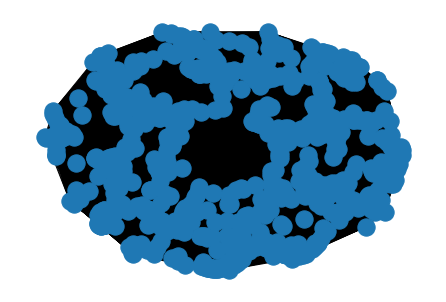

In [40]:
c=0
for component in list(nx.connected_components(G)):
    c += 1
nx.draw(G)
print('number of nodes =',G.number_of_nodes(),', number of edges =', G.number_of_edges(),'. number of components =',c) 

In [41]:
nx.write_gexf(G,'net with 20 conversation.gexf')
#nx.write_gexf(G,'net_50')

In [29]:
for component in list(nx.connected_components(G)):
    c += 1
    if len(component)<10:
        for node in component:
            G.remove_node(node)

number of nodes = 827 , number of edges = 18085 . number of components = 1


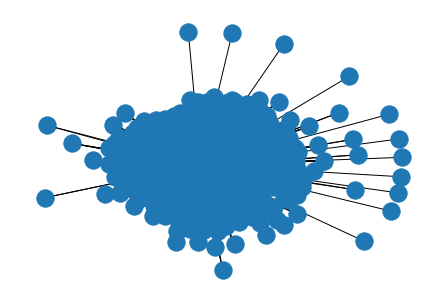

In [30]:
c=0
for component in list(nx.connected_components(G)):
    c += 1
nx.draw(G)
print('number of nodes =',G.number_of_nodes(),', number of edges =', G.number_of_edges(),'. number of components =',c) 

In [43]:
from matplotlib import pylab
def save_graph(graph, file_name):
    #initialze Figure
    plt.figure(num=None, figsize=(40, 40))
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph,pos)
    nx.draw_networkx_edges(graph,pos)
    nx.draw_networkx_labels(graph,pos)

    cut = 1.00
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    plt.xlim(0, xmax)
    plt.ylim(0, ymax)
    
save_graph(G,'g')
print('number of nodes = ', G.number_of_nodes(),
     'number of edges = ', G.number_of_edges())

NameError: name 'plt' is not defined

In [73]:
c=0
for component in list(nx.connected_components(G)):
    c += 1
print(c)

3


In [78]:
G.number_of_nodes()

719